# Componentes básica de la neurona

Recapitulemos todos lo que necesitamos para el funcionamiento básico de una neurona artificial.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-09-02 10:24:54.778655: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-02 10:24:54.825078: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-02 10:24:54.826059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-02 10:24:55.710363: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Entradas

Las neuronas reciben señales de una o varias fuentes. Recordemos que lo ideal es que estas fuentes, si son datos, estén estandarizadas


## Pesos
Para cada una de las entradas existe un peso asociado el cual modela el peso sináptico. Normalmente los pesos son inicializados como valores aleatorios.


## Sesgo (Bias)
Es un peso adicional el cual es independiente de las entradas.

In [3]:
class Neurona00():
    def __init__(self, tamanio_entrada):
        self.pesos = np.random.rand(tamanio_entrada)
        self.bias = np.random.rand()



In [4]:
neurona00_1 = Neurona00(3)
print("Pesos iniciales de la neurona", neurona00_1.pesos)
print("Sesgo inicial de la neurona",neurona00_1.bias)

neurona00_2 = Neurona00(5)
print("Pesos iniciales de la neurona", neurona00_2.pesos)
print("Sesgo inicial de la neurona",neurona00_2.bias)


Pesos iniciales de la neurona [0.58162583 0.0619886  0.41929384]
Sesgo inicial de la neurona 0.8483279342552855
Pesos iniciales de la neurona [0.21856652 0.01444471 0.63040199 0.55591088 0.17843283]
Sesgo inicial de la neurona 0.08356168916162399


## Valor neto

Es la suma de las entradas multiplicadas por sus respectivos pesos, más el valor del sesgo.

In [5]:
class Neurona01(Neurona00):
    def valor_neto(self,entrada):
        return np.dot(entrada, self.pesos) + self.bias  # incluso esta función puede cambiar esta es la standar

In [6]:
neurona01 = Neurona01(3)
entrada = np.array([1,10,100])
print("Pesos iniciales de la neurona", neurona01.pesos)
print("Sesgo inicial de la neurona",neurona01.bias)
print("Valor neto de la neurona",neurona01.valor_neto(entrada))


Pesos iniciales de la neurona [0.13961425 0.38307225 0.08819357]
Sesgo inicial de la neurona 0.9089951691839523
Valor neto de la neurona 13.698688943164072


## Función de activación

Este componente es una función que recibe un único valor, la salida del valor neto, e indica si la neurona se activa y su nivel de activación. Es decir, el valor de salida de la neurona.

Aquí tenemos una amplia oferta de funciones para elegir.

In [7]:
from tensorflow.keras.activations import elu, exponential, gelu, hard_sigmoid, linear, relu, selu, sigmoid, softmax, softplus, softsign, swish, tanh

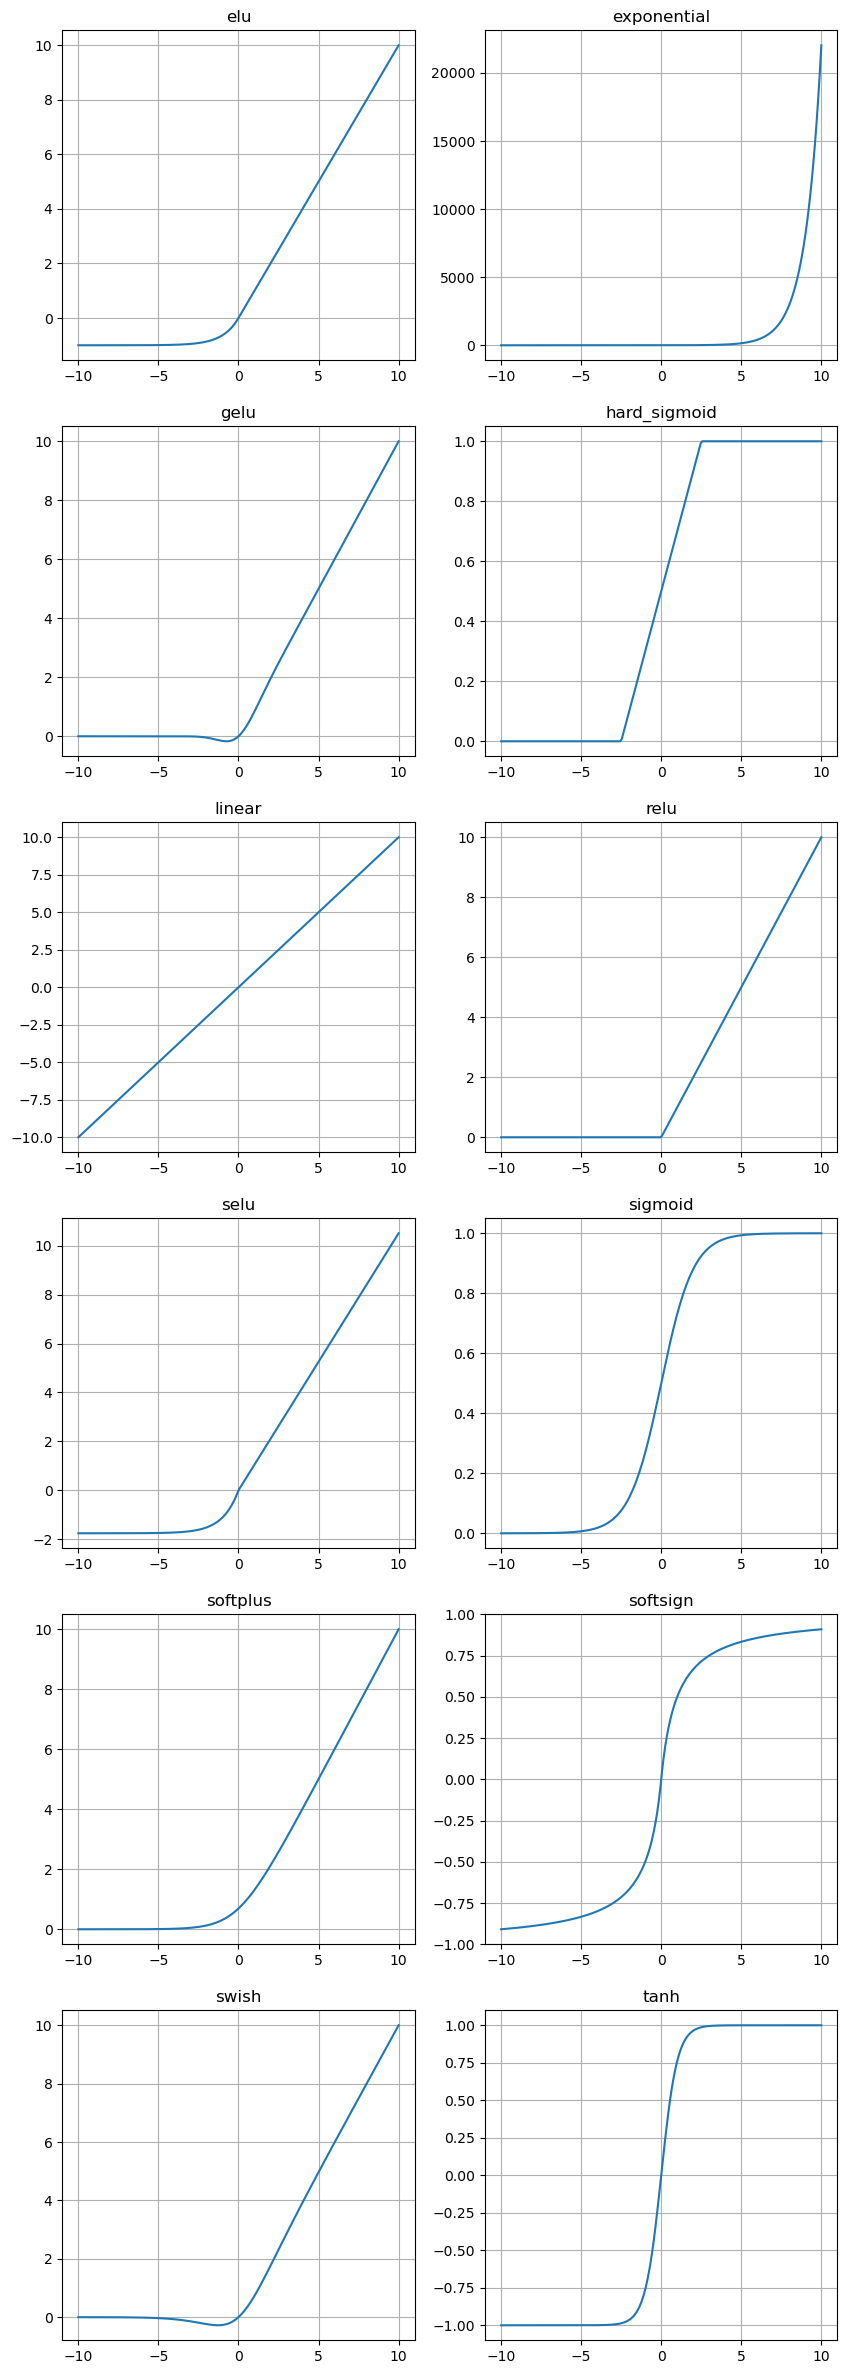

In [9]:
x = tf.constant(np.linspace(-10, 10, 200))
funciones = [elu, exponential, gelu, hard_sigmoid, linear, relu, selu, sigmoid, softplus, softsign, swish, tanh]

plt.figure(figsize=(10, 30))
for i,funcion in enumerate(funciones):
    plt.subplot(6, 2, i+1)
    plt.plot(x, funcion(x), label=funcion.__name__)
    plt.title(funcion.__name__)
    plt.grid()

In [10]:
class Neurona02(Neurona01):

    def __init__(self, tamanio_entrada, funcion_activacion):
        self.pesos = np.random.rand(tamanio_entrada)
        self.bias = np.random.rand()
        self.funcion_activacion = funcion_activacion

    def salida(self,entrada):
        return self.funcion_activacion(self.valor_neto(entrada))

In [11]:
neurona02_1 = Neurona02(3,relu)
entrada = tf.constant(np.random.rand(3))
print("Pesos iniciales de la neurona", neurona02_1.pesos)
print("Sesgo inicial de la neurona",neurona02_1.bias)
print("Valor neto de la neurona",neurona02_1.valor_neto(entrada))
print("Valor de salida de la neurona",neurona02_1.salida(entrada))
print("-"*80)
neurona02_2 = Neurona02(3,sigmoid)
print("Pesos iniciales de la neurona", neurona02_2.pesos)
print("Sesgo inicial de la neurona",neurona02_2.bias)
print("Valor neto de la neurona",neurona02_2.valor_neto(entrada))
print("Valor de salida de la neurona",neurona02_2.salida(entrada))

Pesos iniciales de la neurona [0.25052941 0.13734106 0.33215561]
Sesgo inicial de la neurona 0.9633098613810858
Valor neto de la neurona 1.1831005510589825
Valor de salida de la neurona tf.Tensor(1.1831005510589825, shape=(), dtype=float64)
--------------------------------------------------------------------------------
Pesos iniciales de la neurona [0.32329068 0.9645795  0.22309054]
Sesgo inicial de la neurona 0.7775527750813771
Valor neto de la neurona 1.5880596055654872
Valor de salida de la neurona tf.Tensor(0.8303429280034692, shape=(), dtype=float64)


# Componentes para el entrenamiento de la neurona

Ahora para realizar el entrenamiento necesitamos definir algunos elementos extra.

# Función de pérdida

Es la función encargada de *medir la distancia* entre la salida de la neurona y el valor esperado. Con esto calculamos el nivel de error de la salida de la neurona respecto a los valores otorgados.


In [12]:
from tensorflow.keras.losses import binary_crossentropy , mean_squared_error , mean_absolute_error , mean_absolute_percentage_error

In [13]:
from itertools import product

valores_reales_posibles = np.array([0, 1])
valores_predichos_posibles = np.array([0, 0.1, 0.5, 0.9, 1])

combinations = list(product(valores_reales_posibles, valores_predichos_posibles))
combinations

[(0, 0.0),
 (0, 0.1),
 (0, 0.5),
 (0, 0.9),
 (0, 1.0),
 (1, 0.0),
 (1, 0.1),
 (1, 0.5),
 (1, 0.9),
 (1, 1.0)]

In [15]:
y_true = [[0, 1], [0, 0]]
y_pred = [[0.6, 0.4], [0.4, 0.6]]
loss = binary_crossentropy(y_true, y_pred)
assert loss.shape == (2,)
loss.numpy()

array([0.9162905 , 0.71355796], dtype=float32)

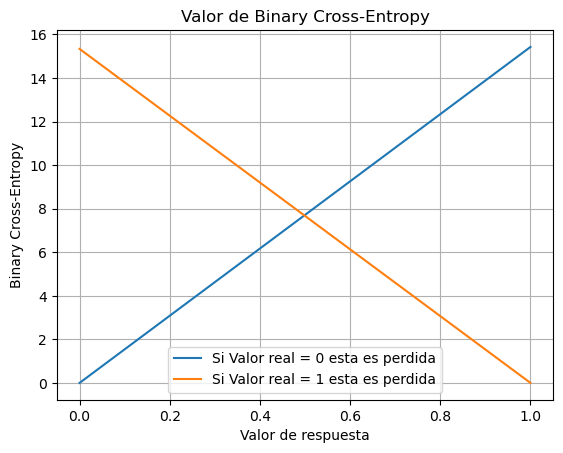

In [18]:
y_pred_prob = np.linspace(0, 1, 101)
bce_val_0 = [binary_crossentropy([[x]],[[float(0)]]).numpy()[0] for x in y_pred_prob]
bce_val_1 = [binary_crossentropy([[x]],[[float(1)]]).numpy()[0] for x in y_pred_prob]

plt.plot(y_pred_prob, bce_val_0, label = "Si Valor real = 0 esta es perdida")
plt.plot(y_pred_prob, bce_val_1, label = "Si Valor real = 1 esta es perdida")
plt.title('Valor de Binary Cross-Entropy')
plt.xlabel('Valor de respuesta')
plt.ylabel('Binary Cross-Entropy')
plt.legend()
plt.grid()
plt.show()

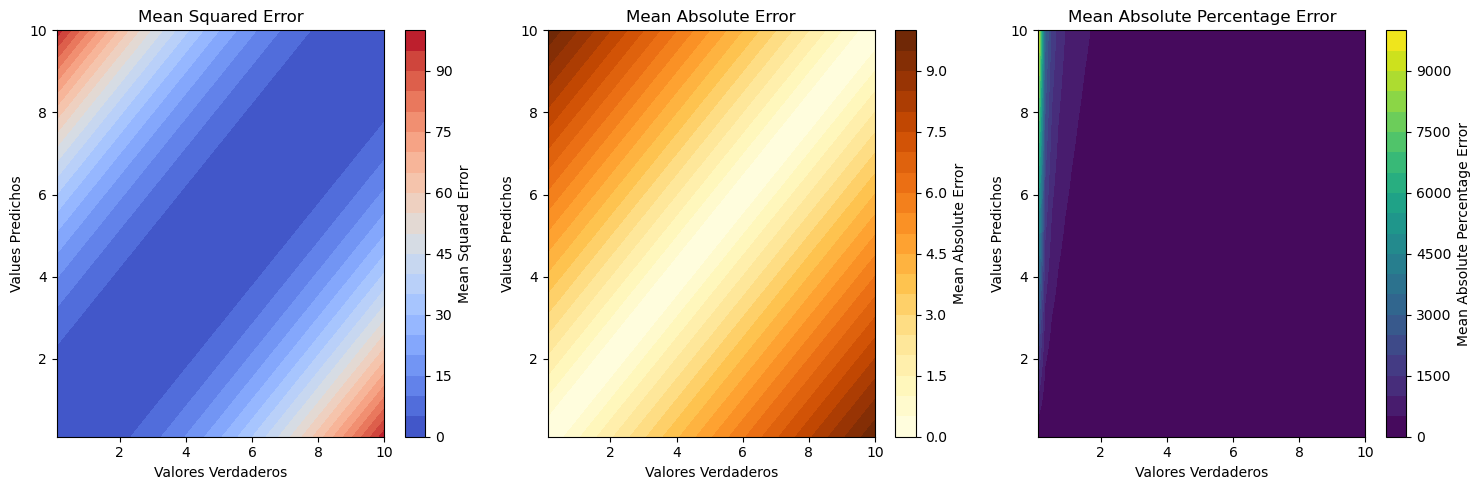

In [19]:
true_values = np.linspace(0.1, 10, 50)
pred_values = np.linspace(0.1, 10, 50)
X, Y = np.meshgrid(true_values, pred_values)

Z_mse = np.empty_like(X)
Z_mae = np.empty_like(X)
Z_mape = np.empty_like(X)

for i in range(Z_mse.shape[0]):
    for j in range(Z_mse.shape[1]):
        Z_mse[i, j] = mean_squared_error([X[i, j]], [Y[i, j]]).numpy()
        Z_mae[i, j] = mean_absolute_error([X[i, j]], [Y[i, j]]).numpy()
        Z_mape[i, j] = mean_absolute_percentage_error([X[i, j]], [Y[i, j]]).numpy()

# Create a single contour plot with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Mean Squared Error with 'coolwarm' colormap
c1 = axs[0].contourf(X, Y, Z_mse, cmap='coolwarm', levels=20)
axs[0].set_title('Mean Squared Error')
axs[0].set_xlabel('Valores Verdaderos')
axs[0].set_ylabel('Values Predichos')
plt.colorbar(c1, ax=axs[0], label='Mean Squared Error')

# Plot Mean Absolute Error with 'YlOrBr' colormap
c2 = axs[1].contourf(X, Y, Z_mae, cmap='YlOrBr', levels=20)
axs[1].set_title('Mean Absolute Error')
axs[1].set_xlabel('Valores Verdaderos')
axs[1].set_ylabel('Values Predichos')
plt.colorbar(c2, ax=axs[1], label='Mean Absolute Error')

# Plot Mean Absolute Percentage Error with 'viridis' colormap
c3 = axs[2].contourf(X, Y, Z_mape, cmap='viridis', levels=20)
axs[2].set_title('Mean Absolute Percentage Error')
axs[2].set_xlabel('Valores Verdaderos')
axs[2].set_ylabel('Values Predichos')
plt.colorbar(c3, ax=axs[2], label='Mean Absolute Percentage Error')

plt.tight_layout()
plt.show()

Mit En mean sqaured error su banda central es muy grande a diff de mean absolute error

Ahora ya podemos calcular el error

In [20]:
class Neurona03(Neurona02):
    # compila es más sobre el proceso de entrenamiento pero lo estamos englobando en neurona
    def compila(self,funcion_perdida):
        self.funcion_perdida = funcion_perdida

    def calcula_error(self,entradas,y_real):
        return self.funcion_perdida([self.salida(entradas)] ,y_real)

In [21]:
entrada = tf.constant(np.random.rand(3))
# Regresion??
salida_real = tf.constant([[4.0]])

neurona03_1 = Neurona03(3,relu)
neurona03_1.compila(mean_squared_error)

print("Pesos iniciales de la neurona", neurona03_1.pesos)
print("Sesgo inicial de la neurona",neurona03_1.bias)
print("Valor neto de la neurona",neurona03_1.valor_neto(entrada))
print("Valor de salida de la neurona",neurona03_1.salida(entrada))
print("Valor de error",neurona03_1.calcula_error(entrada,salida_real))
print("-"*80)

# Clasificación??
salida_real = tf.constant([[1.0]])
neurona03_2 = Neurona03(3,sigmoid)
neurona03_2.compila(binary_crossentropy)

print("Pesos iniciales de la neurona", neurona03_2.pesos)
print("Sesgo inicial de la neurona",neurona03_2.bias)
print("Valor neto de la neurona",neurona03_2.valor_neto(entrada))
print("Valor de salida de la neurona",neurona03_2.salida(entrada))
print("Valor de error",neurona03_2.calcula_error(entrada,salida_real))

Pesos iniciales de la neurona [0.56621048 0.40347988 0.52675045]
Sesgo inicial de la neurona 0.8864063635064431
Valor neto de la neurona 1.5406683215417236
Valor de salida de la neurona tf.Tensor(1.5406683215417236, shape=(), dtype=float64)
Valor de error tf.Tensor([6.0483117], shape=(1,), dtype=float32)
--------------------------------------------------------------------------------
Pesos iniciales de la neurona [0.52789197 0.43526382 0.92283378]
Sesgo inicial de la neurona 0.3181252122623617
Valor neto de la neurona 1.221571071371101
Valor de salida de la neurona tf.Tensor(0.7723399106233049, shape=(), dtype=float64)
Valor de error tf.Tensor([3.490766], shape=(1,), dtype=float32)


## Optimizador

Estableceremos el algoritmo con el cual minimizaremos la función de pérdida.

Desgraciadamente, los optimizadores de keras están íntimamente integrados a las redes neurales, por lo que no podemos extraer su funcionalidad para nuestra implementación de neurona.

In [17]:
## Esto no se usa lol
# Hiperparámetros del SGD con Momentum
learning_rate = 0.01
momentum = 0.9
epochs = 100

# Inicialización de velocidades para Momentum
slope_velocity = 0.0
intercept_velocity = 0.0

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad

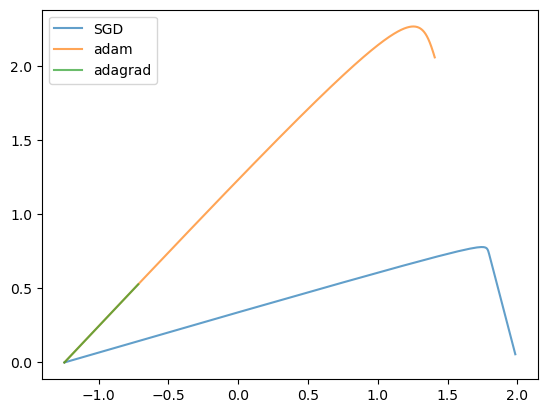

In [24]:


initial_weights = Sequential([
    Dense(units=1, input_shape=(1,))
]).get_weights()
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_train = np.array([2.0, 4.0, 6.0, 8.0, 10.0])

# Definir función para crear y entrenar una neurona
def train_neuron(optimizer, epochs=800):
    model= Sequential([
    Dense(units=1, input_shape=(1,))
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    # pequeña modificación para que todos tengan el mismo set de pesos
    # para que todos inicien igual
    model.set_weights(initial_weights)
    history = [model.fit(x_train, y_train, epochs=1, verbose=0).model.layers[0].get_weights() for _ in range(epochs)]
    history = [initial_weights] + history
    return history# model #history#.history['loss']

sgd_model = train_neuron(SGD(learning_rate=0.01))
adam_model = train_neuron(Adam(learning_rate=0.01))
adagrad_model = train_neuron(Adagrad(learning_rate=0.01))

sgd_model_pesos = [x[0][0][0] for x in sgd_model]
sgd_model_bias = [x[1][0] for x in sgd_model]

adam_model_pesos = [x[0][0][0] for x in adam_model]
adam_model_bias = [x[1][0] for x in adam_model]

adagrad_model_pesos = [x[0][0][0] for x in adagrad_model]
adagrad_model_bias = [x[1][0] for x in adagrad_model]

plt.plot(sgd_model_pesos,sgd_model_bias, label='SGD',alpha=0.7)
plt.plot(adam_model_pesos,adam_model_bias, label='adam',alpha=0.7)
plt.plot(adagrad_model_pesos,adagrad_model_bias, label='adagrad',alpha=0.7)
plt.legend()

Deberían de llegar al 2 con bias de 0